# Fractal nature of GD

Author: Umberto Michelucci

Version 1.0

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.patches as patches

# Helper Functions

## Some Notes about Python Function Used

### random.randrange()

`random.randrange(3)` is a function call in Python, using the `randrange` function from the `random` module. This function is used to generate a random integer within a specified range. Here's a detailed description:

### Overview of `random.randrange(3)`
1. **Module**: 
   - The function `randrange` is part of Python's built-in `random` module, which provides various functions for generating random numbers.

2. **Functionality**: 
   - `randrange(stop)` returns a randomly selected element from the range created by the arguments provided.

3. **Parameter**:
   - In the case of `randrange(3)`, there is a single argument `3`, which means the function will generate a random integer where `0 <= integer < 3`.

4. **Return Value**:
   - It will return an integer, and for `randrange(3)`, the possible return values are `0`, `1`, or `2`.

### Usage
- The `randrange` function is commonly used when you need a random integer within a specific interval. In the example `random.randrange(3)`, it's used to get a random integer among the first three non-negative integers (0, 1, and 2).
- This can be particularly useful in various applications such as simulations, games, random selections, or during testing when random inputs are required.

### Example
To use `random.randrange(3)`, you first need to import the `random` module:

```python
import random

# Generate a random number
num = random.randrange(3)
print(num)  # This will print either 0, 1, or 2
```

### Considerations
- The generated number is inclusive of the lower bound (`0` in this case) and exclusive of the upper bound (`3` in this case).
- To reproduce the same sequence of numbers on different runs, you can set the seed using `random.seed()` before calling `randrange()`.



In [18]:
def sigma(z):
  return 1.0/(1+np.exp(-z))

# This function is not used in this notebook.
def generate_path_3(X, y, w1initial, w2initial, gamma_, iter):
  # The lists contain the initial values
  w1Path = [w1initial]
  w2Path = [w2initial]
  gamma = gamma_
  for i in range (iter): # Iterations
    
      j = random.randrange(3)

      w1_prev = w1Path[-1]
      w2_prev = w2Path[-1]

      s = X[j,0]*w1_prev+X[j,1]*w2_prev
      w1_new = w1_prev - gamma*(sigma(s)-y[j])*sigma(s)*(1-sigma(s))*X[j,0]
      #w1Path.append(w1_new)
      #w1_prev = w1Path[-1]

      w2_new = w2_prev - gamma*(sigma(s)-y[j])*sigma(s)*(1-sigma(s))*X[j,1]
      w2Path.append(w2_new)
      w1Path.append(w1_new)
  return np.array(w1Path), np.array(w2Path)


def generate_path_2(w1initial, w2initial, gamma_, iter):
  # The lists contain the initial values
  w1Path = [w1initial]
  w2Path = [w2initial]
  gamma = gamma_
  for i in range (iter): # Iterations
    
      j = random.randrange(3)

      w1_prev = w1Path[-1]
      w2_prev = w2Path[-1]

      w1_new = w1_prev - gamma*(X[j,0]*w1_prev+X[j,1]*w2_prev-y[j])*X[j,0]
      #w1Path.append(w1_new)
      #w1_prev = w1Path[-1]

      w2_new = w2_prev - gamma*(X[j,0]*w1_prev+X[j,1]*w2_prev-y[j])*X[j,1]
      w2Path.append(w2_new)
      w1Path.append(w1_new)
  return np.array(w1Path), np.array(w2Path)

# The following function has a different way of choosing randomly
# the observation. This version does not create the same fractal
# Structures.
def generate_path(w1initial, w2initial, gamma_, iter):
  # The lists contain the initial values
  w1Path = [w1initial]
  w2Path = [w2initial]
  gamma = gamma_
  for i in range (iter): # Iterations
    
    rand_sample = random.sample([0,1,2],3)
    #rand_sample = [0,1,2]
    for k in range (3): # the 3 input values
      j = rand_sample[k]

      w1_prev = w1Path[-1]
      w2_prev = w2Path[-1]

      w1_new = w1_prev - gamma*(X[j,0]*w1_prev+X[j,1]*w2_prev-y[j])*X[j,0]

      w2_new = w2_prev - gamma*(X[j,0]*w1_prev+X[j,1]*w2_prev-y[j])*X[j,1]
      w2Path.append(w2_new)
      w1Path.append(w1_new)
  return w1Path, w2Path

# Data Preparation

We will use for this example 3 input observations, each having two features. 

In [27]:
x1 = np.array([0,1])
x2 = np.array([1,0.5])
x3 = np.array([-1,0.5])

X = np.array([[0.0,1.0], [1.0,0.5], [1.0,-0.5]])

y = np.array([0,4,0])

In [28]:
print(X)
print(y)

[[ 0.   1. ]
 [ 1.   0.5]
 [ 1.  -0.5]]
[0 4 0]


We will use a single neuron with an identity activation function. Meaning a neuron that generates a linear output

$$
\hat y_i = w_1 x_{i1} +w_2 x_{i2}
$$

where $x_{i1}$ and $x_{i2}$ are the features of our $i$ input observation.

For example (see the input matrix above) we will have $x_{11}=0$ and $x_{12}=1$. The loss function for one single observation $l_i$ is

$$
l_i=\frac{1}{2}(\hat y_i - y_i)^2 
$$

In this notebook we will use SGD, but we can follow two strategies in how we choose the sequence of observations to evaluate the  weights update. In particular we can do the following

__Ordered SGD (function: `generate_path()`)__

- We choose a random order of the three observations. For example it could be 2,3,1
- Then we evaluate the weight update by using, for each gradient calculations $l_2$, $l_3$ and finally $l_1$
- We repeat the previous step a certain number of times.

__Random SGD (function: `generate_path2()`__

- We simply choose each time a random observation and use it to udpate the weight.


# 3D Shape of Loss Function

# Matrix Form

We can write the output of the network in matrix form (easily) as

$$ X
\begin{pmatrix}
w_1 \\
w_2 
\end{pmatrix} = 
y
$$

where $X$ and $y$ are given above. The system above defines three lines in the parameter space $(w_1, w_2)$. If you are not convinced check that the matrix multiplication will give you three linear equations. The three lines defines a triangle that you can see in the figure below.

In [29]:
w1_ = np.arange(-1,4,0.01)
w2_1 = y[0]/X[0,1]-w1_/X[0,1]*X[0,0]
w2_2 = y[1]/X[1,1]-w1_/X[1,1]*X[1,0]
w2_3 = y[2]/X[2,1]-w1_/X[2,1]*X[2,0]

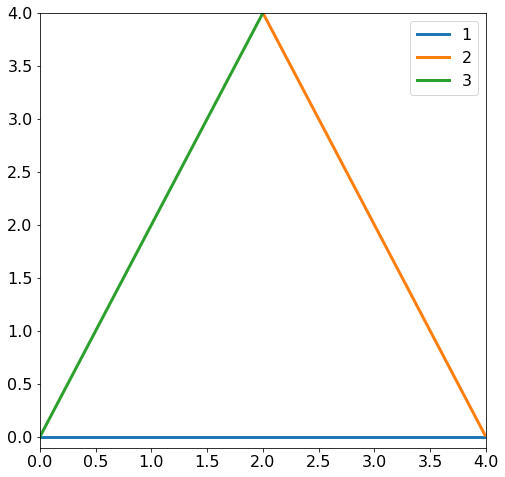

In [30]:
fig = plt.figure(figsize = (8,8))

plt.plot(w1_, w2_1, lw = 3, label = '1')
plt.plot(w1_, w2_2, lw = 3, label = '2')
plt.plot(w1_, w2_3, lw = 3, label = '3')
plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(-.1, 4)
plt.xlim(0,4)
plt.show()

# Minimum determination

We can use a couple of small tricks to determine the location of the minimum. This problem can also be solved by brute force by simply calcualting the derivatives of the total loss function

$$
L = \sum_{i=1}^3 l_i
$$

with respect to $w_1$ and $w_2$ and then solve the system.

But we can be smarter. For example we can note that the slope of the line pependicular to a given line with a slope of $m$ is $-1/m$. Now let us take one of the lines we have defined above, for example the one with index $i=2$:

$$
w_1 +\frac{1}{2} w_2 - 4 = 0
$$

This is the orange line in the figure above. Now let us suppose we use $l_2$ for the weight updates. What do we get? Well we have

$$
\frac{\partial l_2}{\partial w_1} = (w_1 +\frac{1}{2} w_2 - 4)
$$

and 

$$
\frac{\partial l_2}{\partial w_2} = (w_1 +\frac{1}{2} w_2 - 4) \frac{1}{2}
$$

That means that the two weights updates will be

$$
\Delta w_1 = - \alpha (w_1 +\frac{1}{2} w_2 - 4) 
$$

and

$$
\Delta w_2 = - \alpha (w_1 +\frac{1}{2} w_2 - 4) \frac{1}{2}  
$$

And you will notice easily that $\Delta w_2 / \Delta w_1$ is nothing else that minus the inverse of the slope of the initial line. That means that __the weight udpates when each observations is taken singularly goes along the perpendicular direction to the respective line__.


No handles with labels found to put in legend.


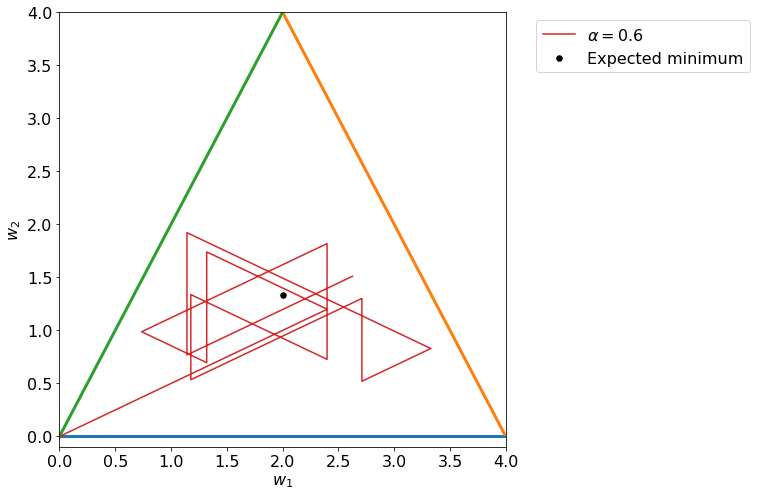

In [31]:
fig = plt.figure(figsize = (8,8))

# Initial Point (0,0)
# Learning rate is 0.6
w1Path, w2Path = generate_path(0,0,0.6,5)

plt.plot(w1_, w2_1, lw = 3)
plt.plot(w1_, w2_2, lw = 3)
plt.plot(w1_, w2_3, lw = 3)
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(0,4)



plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)
plt.ylabel('$w_2$', fontsize = 16)
plt.plot(w1Path, w2Path,  label = r'$\alpha = 0.6$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))
plt.show()

The minimum can be found by symmetry. Note that given the symmetry of the lines, the minimum must be on the vertical line for $w_1=2$. So the only thing we need to determine is the value of $w_2$.  So we can simply substitute $w_1=2$ in the formula for $L$


$$
L = \sum_{i=1}^3 l_i
$$

derive it and set it equal to zero (remember we are looking for the minimum). We will get easily

$$
\frac{\partial L}{\partial w_j} = \sum_{i=1}^3 (w_1 x_{i1} +w_2 x_{i2}-y_i) x_{ij}
$$

This can be written (remember the values of $X$ and $y$) as one single equation (we simply derive by $w_2$) as we know already $w_1$:

$$
(2\cdot 0 + w_2*1-0)\cdot 1 + (2\cdot 1+w_2*0.5-4)\cdot 1/2 + (-2\cdot 1-w_2*0.5)\cdot (-1/2) = 0
$$

this can be simplified as

$$
-2+w_2+1-2+w_2/4+1+w_2/4=0 
$$
that is
$$
-2 + w_2 \frac{3}{2} = 0 \rightarrow w_2 = \frac{4}{3}
$$

So the minimum is located at $(2,\displaystyle\frac{4}{3})$.


# Algorithm Convergence

Let us check now the set of points that we get by simply udpating weights one observation at a time in the same order (the initial order is determined randomlly, for example 2,3,1).

No handles with labels found to put in legend.


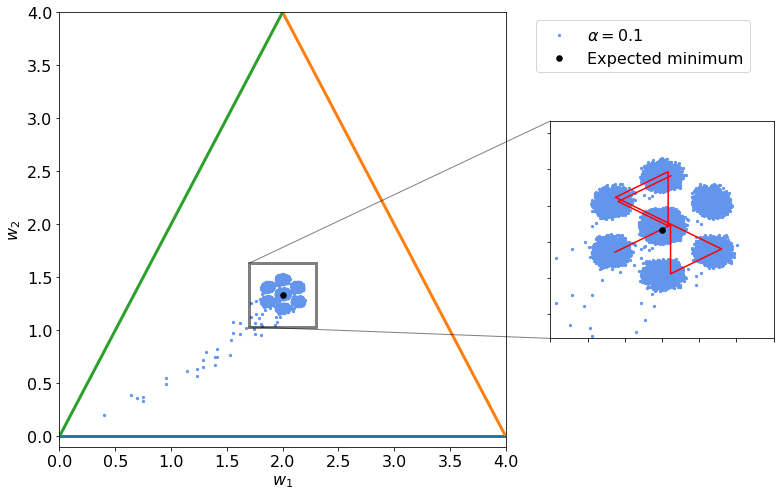

In [9]:

dist = 0.3
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)

# Initial Point (0,0)
# Learning rate is
alpha = 0.1
w1Path, w2Path = generate_path(0,0,alpha,10**4)

plt.plot(w1_, w2_1, lw = 3)
plt.plot(w1_, w2_2, lw = 3)
plt.plot(w1_, w2_3, lw = 3)
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(0,4)



plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)
plt.ylabel('$w_2$', fontsize = 16)
plt.scatter(w1Path, w2Path,  label = r'$\alpha = $'+str(alpha), s = 5, color = 'cornflowerblue')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

#rect = patches.Rectangle((2.0-dist, 4.0/3.0-dist), 2.0*dist, 2.0*dist, linewidth=3, edgecolor='black', facecolor='none', zorder = 200)
#ax.add_patch(rect)



# inset axes....
axins = ax.inset_axes([1.1, 0.25, 0.5, 0.5])
axins.scatter(w1Path, w2Path,  label = r'$\alpha = 0.1$', s = 5, color = 'cornflowerblue')
axins.plot(w1Path[5000:5010], w2Path[5000:5010],  label = r'$\alpha = 0.1$ (10 iter.)',  color = 'red')
axins.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

# sub region of the original image
x1, x2, y1, y2 = 2.0-dist, 2.0+dist, 4.0/3.0-dist, 4.0/3.0+dist
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="black", lw = 3, label = '')

plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))

plt.show()

The algorithm does not really converges and simply oscillates around the minimum (indicated by the black dot).

Below you can see another example with a larger value of $\alpha = 0.3$.

No handles with labels found to put in legend.


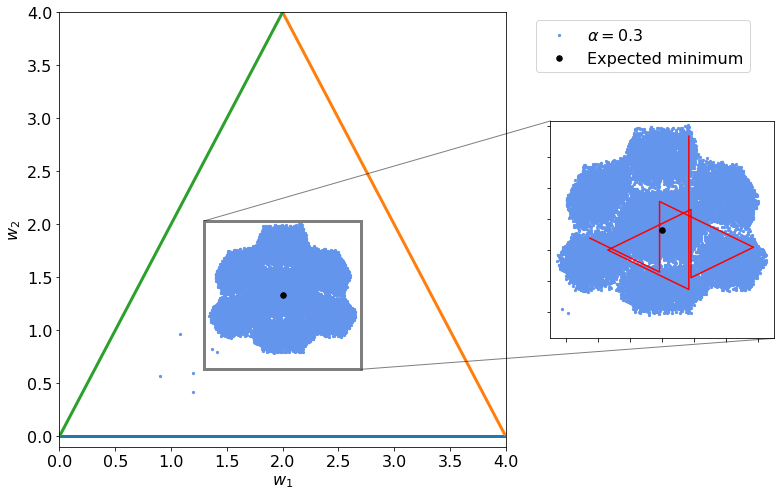

In [10]:

dist = 0.7
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)

# Initial Point (0,0)
# Learning rate is
alpha = 0.3
w1Path, w2Path = generate_path(0,0,alpha,10**4)

plt.plot(w1_, w2_1, lw = 3)
plt.plot(w1_, w2_2, lw = 3)
plt.plot(w1_, w2_3, lw = 3)
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(0,4)



plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)
plt.ylabel('$w_2$', fontsize = 16)
plt.scatter(w1Path, w2Path,  label = r'$\alpha = $'+str(alpha), s = 5, color = 'cornflowerblue')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

# inset axes....
axins = ax.inset_axes([1.1, 0.25, 0.5, 0.5])
axins.scatter(w1Path, w2Path,  label = r'$\alpha = 0.1$', s = 5, color = 'cornflowerblue')
axins.plot(w1Path[5000:5010], w2Path[5000:5010],  label = r'$\alpha = 0.1$ (10 iter.)',  color = 'red')
axins.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')


# sub region of the original image
x1, x2, y1, y2 = 2.0-dist, 2.0+dist, 4.0/3.0-dist, 4.0/3.0+dist
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="black", lw = 3, label = '')

plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))

plt.show()

# Gradients 

Now we can try to update the weights in a random manner (meaning not in the same order). This small change in how we update the weights disrupt completely the output of what happens in parameter space. You can see below what happens: **Fractals appears**!!

No handles with labels found to put in legend.


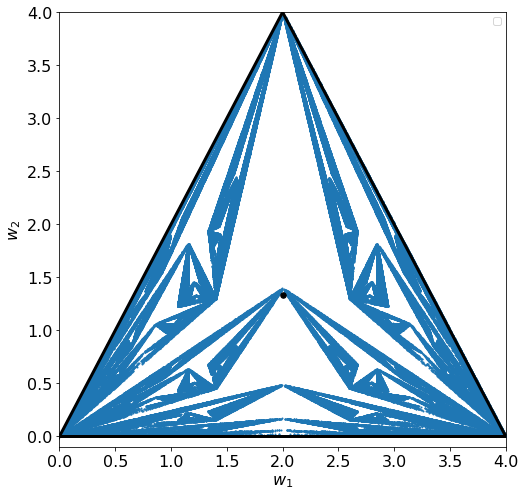

In [41]:
fig = plt.figure(figsize = (8,8))

# Initial Point (0,0)
# Learning rate is 0.6
w1Path, w2Path = generate_path_2(0,0,0.65,400000)

plt.plot(w1_, w2_1, lw = 3, color = 'black')
plt.plot(w1_, w2_2, lw = 3, color = 'black')
plt.plot(w1_, w2_3, lw = 3, color = 'black')
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(0,4)



plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)


plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)
plt.ylabel('$w_2$', fontsize = 16)
plt.scatter(w1Path, w2Path,  label = r'$\alpha = 0.65$', s = 1)
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

#plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))
#plt.ylabel('$w_2$', fontsize = 16)
#plt.scatter(w1Path, w2Path,  label = r'$\alpha = 0.65$')
#plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

#plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))
fig.savefig('fractal1.png', dpi = 300)
plt.show()

In [42]:
w1Path, w2Path = generate_path_2(0,0,0.65,10**7)

You can see below in the zommed out region that this is a fractal. The zoom looks exactly how the entire image! Note that this is not the definition of a fractal but is an amazing property of such structures!

No handles with labels found to put in legend.


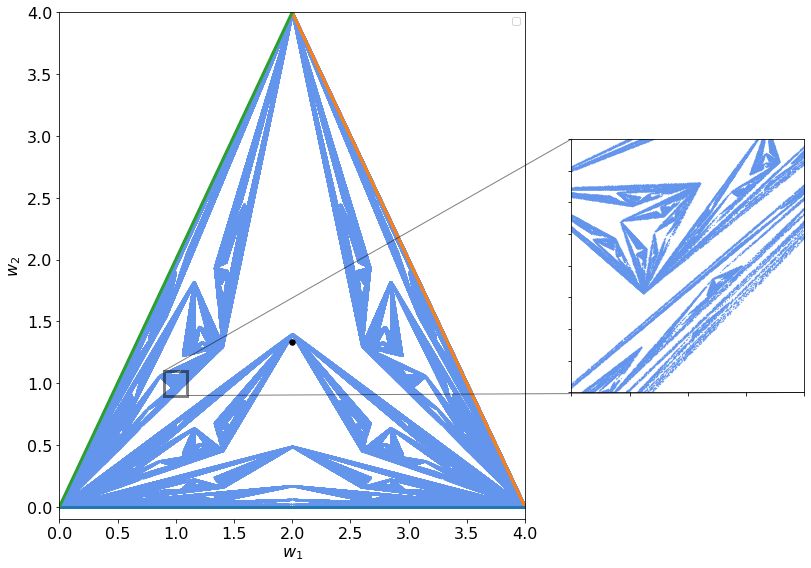

In [47]:

dist = 0.7
fig = plt.figure(figsize = (14,8))

ax = fig.add_subplot(1,1,1)

# Initial Point (0,0)
# Learning rate is
alpha = 0.65
#w1Path, w2Path = generate_path(0,0,alpha,10**4)

plt.plot(w1_, w2_1, lw = 3)
plt.plot(w1_, w2_2, lw = 3)
plt.plot(w1_, w2_3, lw = 3)
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(0,4)



plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)
plt.ylabel('$w_2$', fontsize = 16)
plt.scatter(w1Path, w2Path,  label = r'$\alpha = $'+str(alpha), s = 0.5, color = 'cornflowerblue')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

# inset axes....
axins = ax.inset_axes([1.1, 0.25, 0.5, 0.5])
axins.scatter(w1Path, w2Path,  label = r'$\alpha = 0.1$', s = 0.1, color = 'cornflowerblue')
axins.plot(w1Path[5000:5010], w2Path[5000:5010],  label = r'$\alpha = 0.65$ (10 iter.)',  color = 'red')
axins.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')


# sub region of the original image
x1, x2, y1, y2 = 0.9, 1.1, 0.9, 1.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="black", lw = 3, label = '')

#plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
fig.savefig('fractl2.png', dpi = 300)
plt.show()

By changing the parameters you can see the differences in output and how the resulting structures change.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


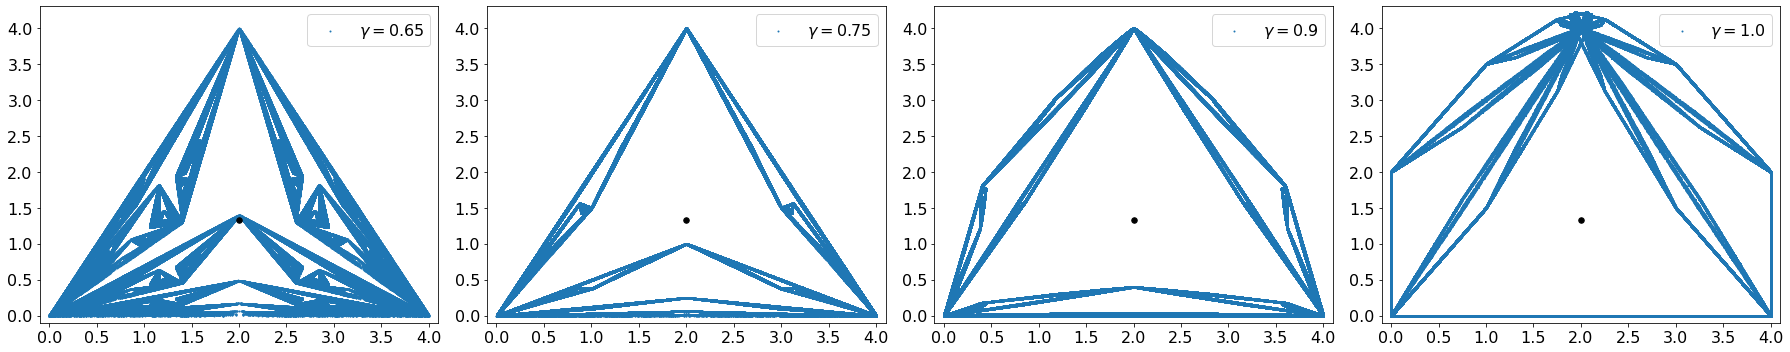

In [59]:
N = 10**6
fig = plt.figure(figsize = (25,5))

fig.add_subplot(1,4,1)
w1Path, w2Path = generate_path_2(0,0,0.65,N)

plt.legend()
plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.65$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


fig.add_subplot(1,4,2)
w1Path, w2Path = generate_path_2(0,0,0.75,N)


plt.legend(fontsize = 16)
plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)



plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.75$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

fig.add_subplot(1,4,3)
w1Path, w2Path = generate_path_2(0,0,0.9,N)


plt.legend(fontsize = 16)
plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.9$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

fig.add_subplot(1,4,4)
w1Path, w2Path = generate_path_2(0,0,1.0,N)


plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)


#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 1.0$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16, loc = 'upper right')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
fig.savefig('fractals3.png', dpi = 300)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


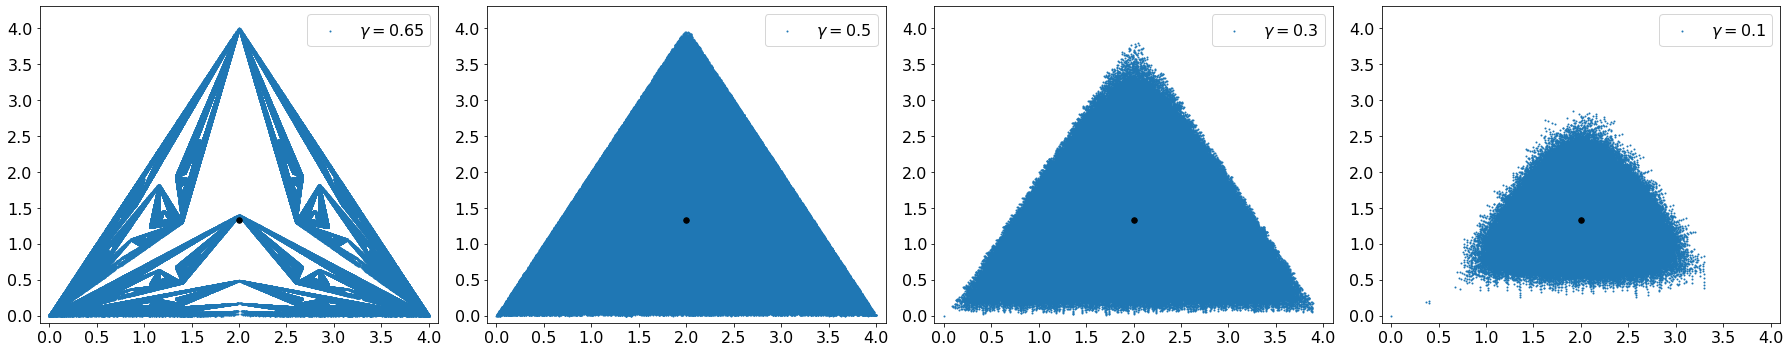

In [62]:
N = 10**6
fig = plt.figure(figsize = (25,5))

fig.add_subplot(1,4,1)
w1Path, w2Path = generate_path_2(0,0,0.65,N)

plt.legend()
plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.65$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


fig.add_subplot(1,4,2)
w1Path, w2Path = generate_path_2(0,0,0.5,N)


plt.legend(fontsize = 16)
plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)



plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.5$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

fig.add_subplot(1,4,3)
w1Path, w2Path = generate_path_2(0,0,0.3,N)


plt.legend(fontsize = 16)
plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.3$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

fig.add_subplot(1,4,4)
w1Path, w2Path = generate_path_2(0,0,0.1,N)


plt.ylim(-0.1, 4.3)
plt.xlim(-0.1,4.1)


#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 1, label = '$\gamma = 0.1$')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend(fontsize = 16, loc = 'upper right')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()

fig.savefig('fractals4.png', dpi = 300)

plt.show()

By reducing the parameter the fractal nature of the structure disappears suddenly and a cloud of points just appear as you can see in the images above and below.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


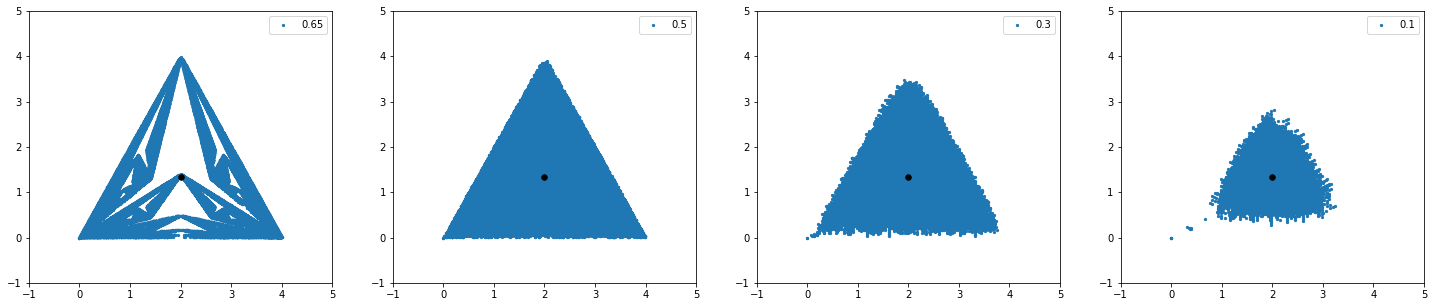

In [15]:
N = 10**5
fig = plt.figure(figsize = (25,5))

fig.add_subplot(1,4,1)
w1Path, w2Path = generate_path_2(0,0,0.65,N)

plt.legend()
plt.ylim(-1, 5)
plt.xlim(-1,5)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 5, label = '0.65')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend()


fig.add_subplot(1,4,2)
w1Path, w2Path = generate_path_2(0,0,0.5,N)


plt.legend()
plt.ylim(-1, 5)
plt.xlim(-1,5)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 5, label = '0.5')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend()

fig.add_subplot(1,4,3)
w1Path, w2Path = generate_path_2(0,0,0.3,N)


plt.legend()
plt.ylim(-1, 5)
plt.xlim(-1,5)

#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 5, label = '0.3')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend()


fig.add_subplot(1,4,4)
w1Path, w2Path = generate_path_2(0,0,0.1,N)


plt.ylim(-1, 5)
plt.xlim(-1,5)


#plt.xlim(1.6, 2.4)
#plt.ylim(1.0,1.7)


plt.scatter(w1Path, w2Path, s = 5, label = '0.1')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100)

plt.legend()

plt.show()

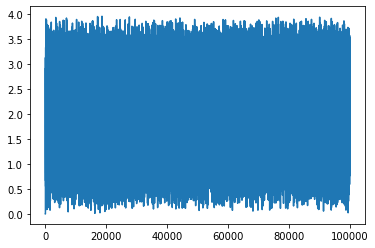

In [16]:
w1Path, w2Path = generate_path_2(0,0,0.5,N)
plt.plot(w1Path)

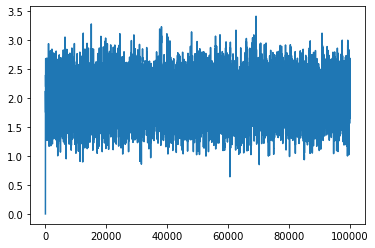

In [17]:
w1Path, w2Path = generate_path_2(0,0,0.1,N)
plt.plot(w1Path)

## Evolution of parameters vs. Iteration Number

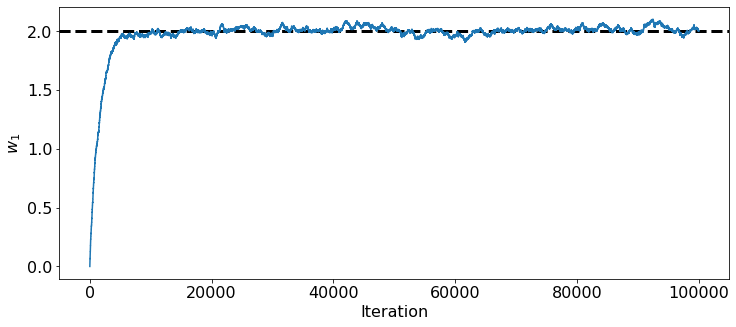

In [18]:
plt.figure(figsize = (12,5))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Iteration', fontsize = 16)
plt.ylabel('$w_1$', fontsize = 16)
w1Path, w2Path = generate_path_2(0,0,0.001,N)
plt.axhline(2.0, ls = '--', lw = 3, color = 'black')
plt.plot(w1Path)

In [70]:
alpha = 0.0005
w1Path, w2Path = generate_path_2(0,0,alpha,N)

No handles with labels found to put in legend.


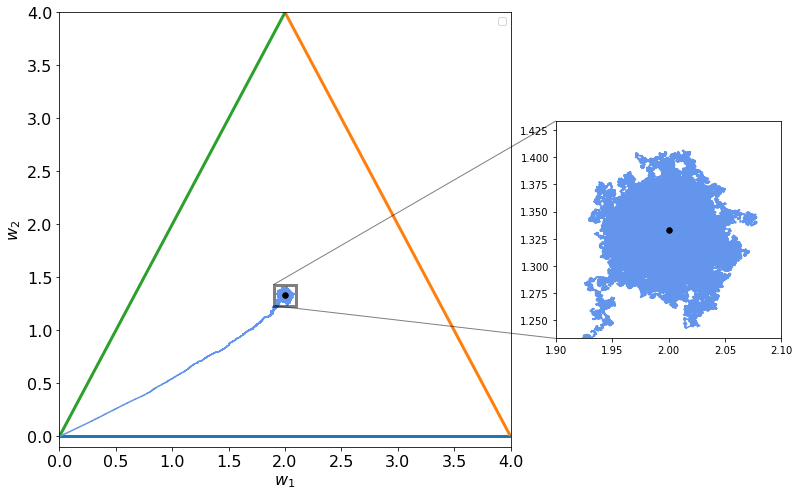

In [71]:
dist = 0.1
fig = plt.figure(figsize = (14,7))

ax = fig.add_subplot(1,1,1)

# Initial Point (0,0)
# Learning rate is
#alpha = 0.3
#w1Path, w2Path = generate_path(0,0,alpha,10**4)

plt.plot(w1_, w2_1, lw = 3)
plt.plot(w1_, w2_2, lw = 3)
plt.plot(w1_, w2_3, lw = 3)
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(0,4)



plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('$w_1$', fontsize = 16)
plt.ylabel('$w_2$', fontsize = 16)
plt.plot(w1Path, w2Path,  label = r'$\alpha = $'+str(alpha),  color = 'cornflowerblue')
plt.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')

# inset axes....
axins = ax.inset_axes([1.1, 0.25, 0.5, 0.5])
axins.plot(w1Path, w2Path,  label = r'$\alpha = 0.1$', color = 'cornflowerblue')
axins.plot(w1Path[5000:5010], w2Path[5000:5010],  label = r'$\alpha = 0.1$ (10 iter.)',  color = 'red')
axins.scatter(2,4/3, marker = 'o', s = 30, color = 'black', zorder = 100, label = 'Expected minimum')


# sub region of the original image
x1, x2, y1, y2 = 2.0-dist, 2.0+dist, 4.0/3.0-dist, 4.0/3.0+dist
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.set_xticklabels('')
#axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="black", lw = 3, label = '')

#plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))

plt.tight_layout()
fig.savefig('fractals5.png', dpi = 300)
plt.show()